In [1]:
#Some Import Important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the Data set
df = pd.read_csv("/content/drive/My Drive/Data_Train.csv")

#Exploring the Data set

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
#Unique value of Duration column
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
4h 10m       1
3h 25m       1
32h 55m      1
13h 35m      1
33h 20m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
#Unique value of Airline column
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [11]:
#Unique value of Route Column
df['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BOM → NDC → HYD                   1
BOM → JDH → JAI → DEL → HYD       1
BOM → BBI → HYD                   1
BOM → CCU → HYD                   1
BOM → JAI → DEL → HYD             1
Name: Route, Length: 128, dtype: int64

#Cleaning the Data set

In [12]:
#How to check NaN/NULL values in this data set
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
#Drop the NaN/Null Values
df.dropna(inplace=True)

In [14]:
#check nan and null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
#extracting the day of journey and month of journey from the Date of journey column
df["Journe_day"] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journe_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
#Drop the Date_of_Journey column
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [18]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journe_day',
       'Journey_month'],
      dtype='object')

In [19]:
#Extracting hours
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
#Extracting thr minuts
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [20]:
#Now we can drop 'Dep_Time' it is no use
df.drop(['Dep_Time'],axis=1,inplace=True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journe_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [22]:
# Similar to Date_of_Journey we can extract values from Arrival_Time
#we can extract values from Arrival_Time
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [23]:
#Now we can drop of Arrival_Time column
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [24]:
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journe_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2: # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [26]:
# Adding duration_hours and duration_mins in list with Data Frame
df['Duration_hours'] = duration_hours
df['Duration_mins'] = duration_mins

In [27]:
#Drop the Column of Duration
df.drop(['Duration'],axis=1,inplace=True)

In [28]:
df.head(4)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journe_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25


#Handling Categorical Data

In [29]:
#Number of unique value of Airline column in this Data set
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#Data Visulization

Text(0, 0.5, 'Count')

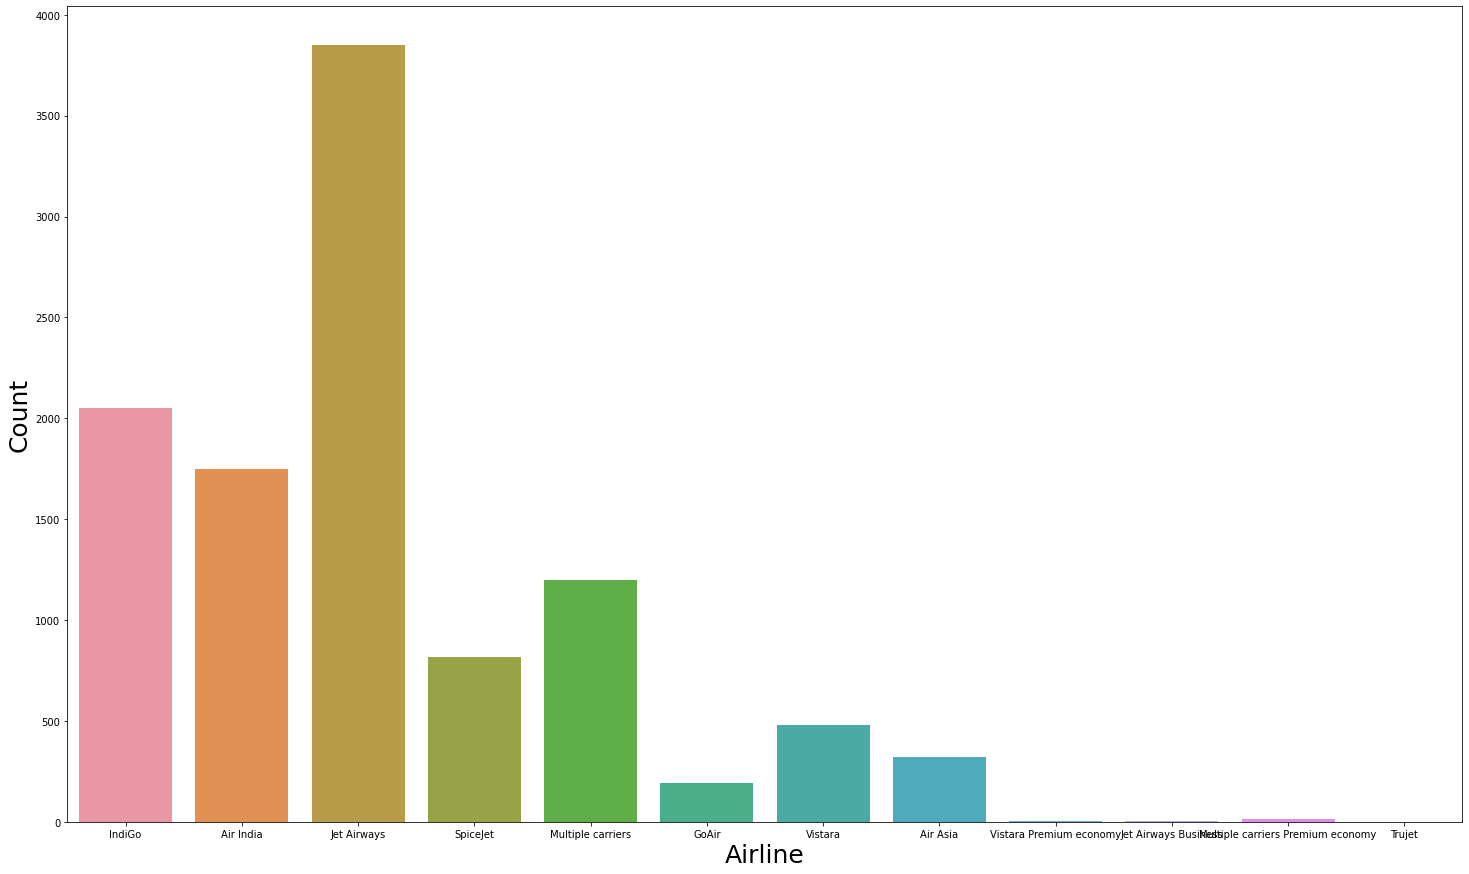

In [30]:
#Counts plot from Airline Column
plt.figure(figsize=(25,15))
sns.countplot(x='Airline',data=df)
plt.xlabel("Airline",fontsize=25)
plt.ylabel("Count",fontsize=25)

Text(0, 0.5, 'Price')

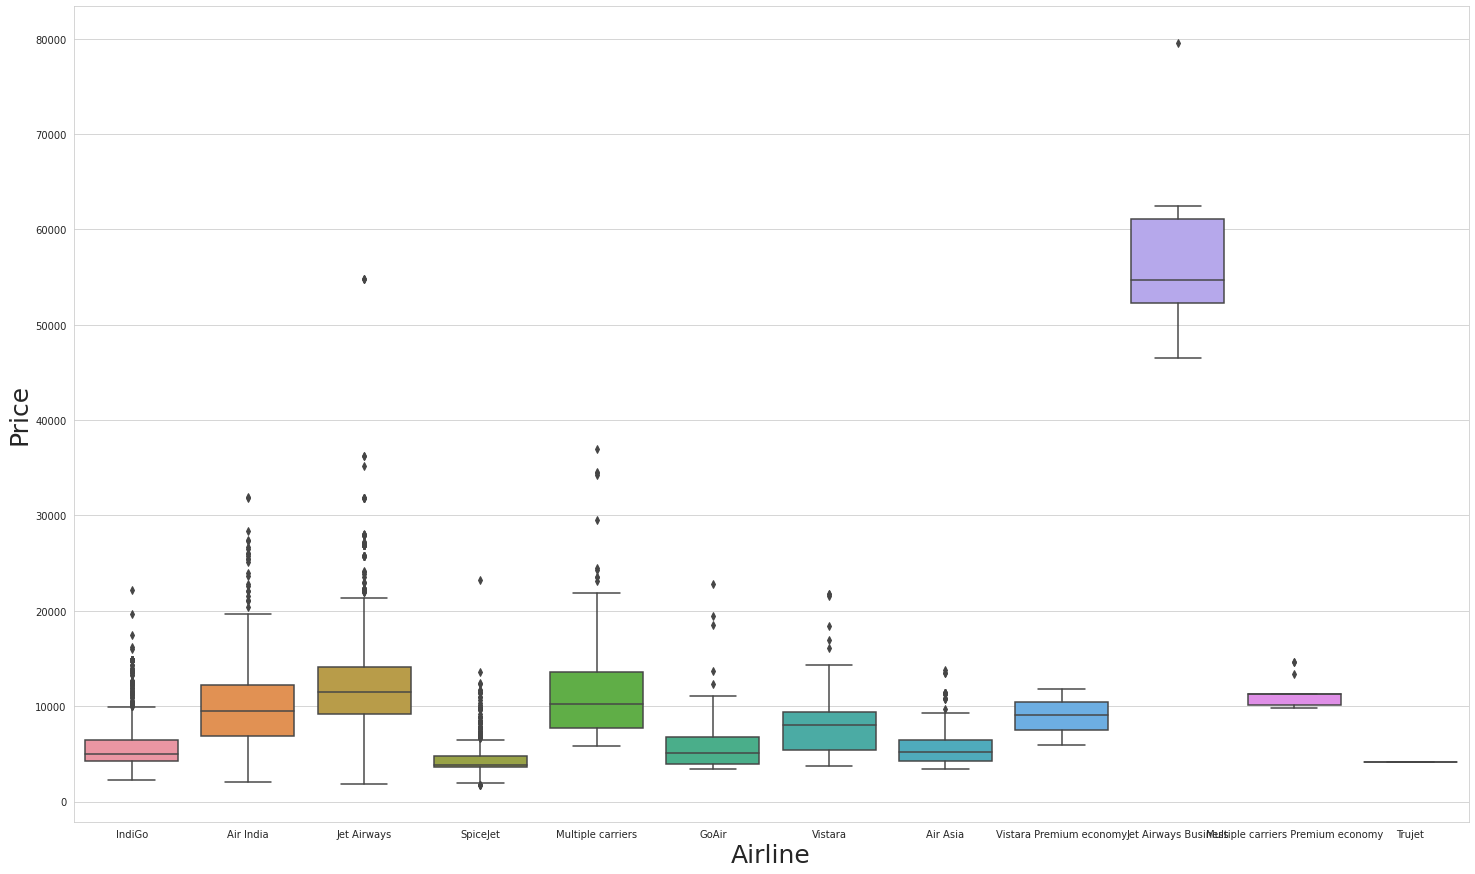

In [31]:
#Box plot from Airline vs Price
plt.figure(figsize=(25,15))
sns.set_style("whitegrid") 
sns.boxplot(x='Airline', y='Price', data=df)
plt.xlabel("Airline",fontsize=25)
plt.ylabel('Price',fontsize=25)

#OneHot Encoding

In [32]:
# As Airline is Nominal Category data we will perform OneHotEncoding
#We Will get dummies variable of Airline column
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)

In [33]:

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [34]:
#Counting the number of Times each category for Source Column
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Text(0, 0.5, 'Price')

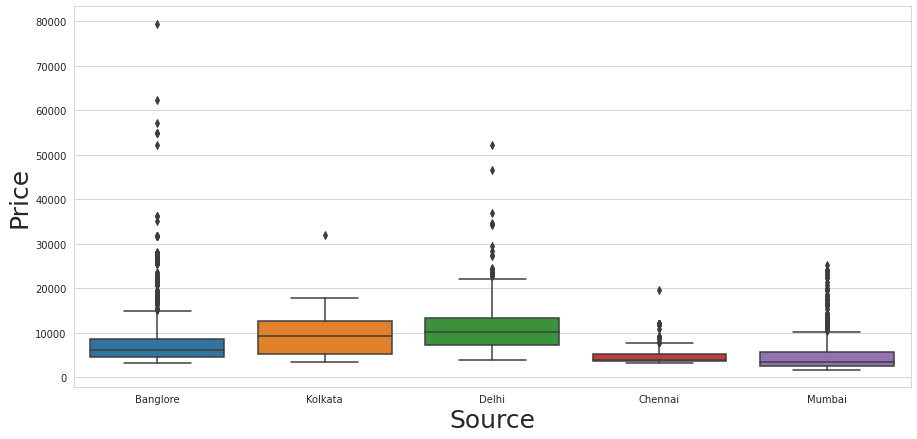

In [35]:
#Boxplot Source vs Price
plt.figure(figsize=(15,7))
sns.boxplot(x='Source', y='Price',data=df)
plt.xlabel("Source",fontsize=25)
plt.ylabel("Price",fontsize=25)

Text(-8.700000000000003, 0.5, 'Price')

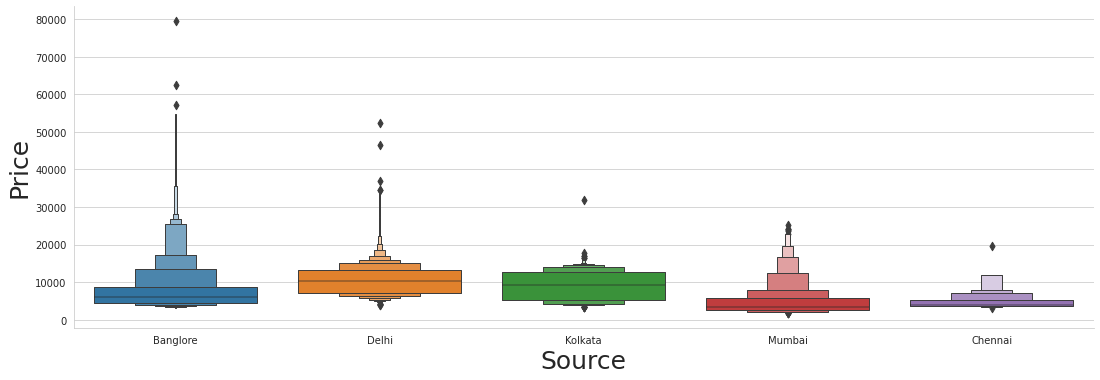

In [36]:
#category plot
#Catplot Source vs Price
sns.catplot(x = "Source",y = "Price", data = df.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 3)
plt.xlabel("Source",fontsize=25)
plt.ylabel("Price",fontsize=25)

In [37]:
#We Will find get_dummies vriable in Source Column and perform OneHot Encoding
Source = df[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

In [38]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [39]:
#Counts the Value of 'Destination' Column
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

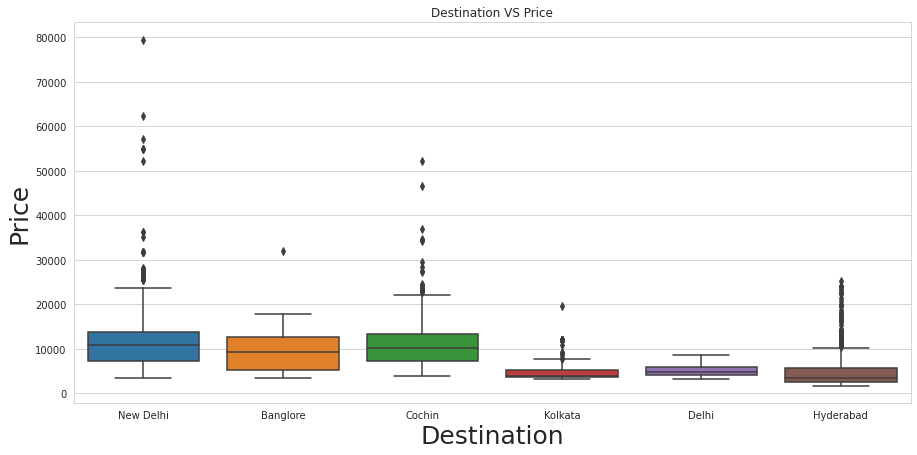

In [40]:
#Box plot For Destination vs Price Column
plt.figure(figsize=(15,7))
plt.title("Destination VS Price")
sns.boxplot(x='Destination', y='Price', data=df)
plt.xlabel("Destination",fontsize=25)
plt.ylabel("Price",fontsize=25)
plt.show()

Text(-8.699999999999996, 0.5, 'Price')

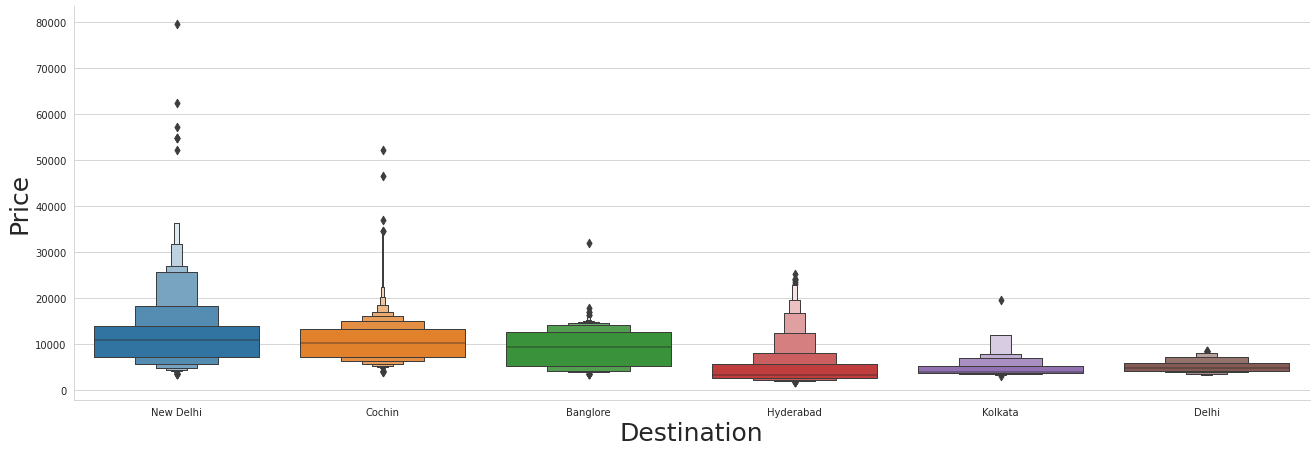

In [41]:
#Catplot for Destination vs Price
sns.catplot(x='Destination', y='Price', data=df.sort_values("Price", ascending=False),kind='boxen',
            height=6, aspect=3)
plt.xlabel("Destination",fontsize=25)
plt.ylabel("Price",fontsize=25)

In [42]:
##As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True) 

In [43]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [44]:
#From Route we will come to know the number of stops
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [45]:
#We will drop Route and Additional_Info as Additional_Info contains
df.drop(["Route" , "Additional_Info"],axis=1,inplace=True)

In [46]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journe_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [47]:
#Total_Stops again Categorical Feature
#Counts the Value of Total_Stops Column
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [49]:
#Convert Object into Numeric form
df.replace({'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4},inplace=True) 

In [50]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journe_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,1,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,2,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,2,13302,1,3,16,50,21,35,4,45


In [51]:
# Concatenate dataframe --> df + Airline + Source + Destination
df_train = pd.concat([df ,Airline,Source,Destination], axis=1)

In [52]:
df_train

,Airline,Source,Destination,Total_Stops,Price,Journe_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,2,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,2,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [53]:
#Drop Airline, Source, and Destination as we have already converted them into OneHotEncoding
df_train.drop(['Airline','Source', 'Destination'], axis=1, inplace=True)

In [54]:
df_train.head()

,Total_Stops,Price,Journe_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
#Showing the Shape of New Data Frame 
df_train.shape

(10682, 30)

#Test Set
Now we will perform above steps in Test data. We are not combining train and test data because of data leakage due to which our test data will know some of the results which is not good for the project

In [56]:
#Load the Test Data set
test_df = pd.read_csv("/content/drive/My Drive/Test_set.csv")

In [57]:
test_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [58]:
#Preprocessing steps
print("Tset Data INfo")
print("****************************************************************")
print(test_df.info())

Tset Data INfo
****************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [59]:
#How to check NaN Values and NaN Values
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

#EDA (Explory Data Ananlysis)

In [60]:
test_df.shape

(2671, 10)

In [61]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [62]:
#How to extract Date_of_Journey column in this Dataset
test_df['Journey_day'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.day
test_df['Journey_month'] = pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [63]:
#drop the column of Date_of_Journey column in this data set
test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [64]:
#Dep Time
test_df['Dep_hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_minute'] = pd.to_datetime(test_df['Dep_Time']).dt.minute

In [65]:
#Drop the Dep_Time Column
test_df.drop(['Dep_Time'],axis=1,inplace=True)

In [66]:
#Arrival_Time
test_df['Arrival_hour'] = pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_minute'] = pd.to_datetime(test_df['Arrival_Time']).dt.minute
#Drop the 'Arrival_column' 
test_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [67]:
duration = list(test_df["Duration"])

for i in range(len(duration)):
    if (len(duration[i].split())!=2):                      
        if "h" in duration[i]:
           duration[i] = duration[i].strip() +"0m"         
        else:
           duration[i] = "0h" + duration[i]                 

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(str(duration[i].split(sep = "h")[0])) 
    duration_mins.append(str(duration[i].split(sep = "m")[0].split()[-1]))

In [68]:
#Adding Duration column to test set
test_df['Duration_hours'] = duration_hours
test_df['Duration_mins'] = duration_mins
#drop the column of 'Duration_column' 
test_df.drop(['Duration'],axis=1,inplace=True)

In [69]:
print(test_df['Airline'].value_counts())

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


In [70]:
print(test_df['Source'].value_counts())

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [71]:
print(test_df['Destination'].value_counts())

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [72]:
Airline = pd.get_dummies(test_df['Airline'],drop_first=True)

In [73]:
Source = pd.get_dummies(test_df['Source'],drop_first=True)

In [74]:
Destination = pd.get_dummies(test_df['Destination'],drop_first=True)

In [75]:
# Route and Total_Stops are related to each other
test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [76]:
#Replacing Total_Stops
test_df.replace({'1 stop':0, 'non-stop':1, '2 stops':2, '3 stops':3, '4 stops':4},inplace=True)

In [77]:
#Concatenate the data -------- test_df, Airline, Source, Destination
df_test = pd.concat([test_df, Airline, Source, Destination], axis = 1)

In [78]:
df_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [79]:
#Shape of Test data
df_test.shape

(2671, 28)

In [80]:
df_test.head(5)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,12,5,6,20,10,20,4,4h0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,21,5,8,0,21,0,13,13h0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Feature Selection

In [81]:
df_train.shape

(10682, 30)

In [82]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journe_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [83]:
#Extracting the Independant Variable
X = df_train[['Total_Stops', 'Journe_day', 'Journey_month', 'Dep_hour',
              'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
              'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
              'Airline_Jet Airways', 'Airline_Jet Airways Business',
              'Airline_Multiple carriers',
              'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
              'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
              'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
              'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
              'Destination_Kolkata', 'Destination_New Delhi']]

In [84]:
X.head()

,Total_Stops,Journe_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,2,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [85]:
#Extracting the Dependant Variable
y=df_train.iloc [:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

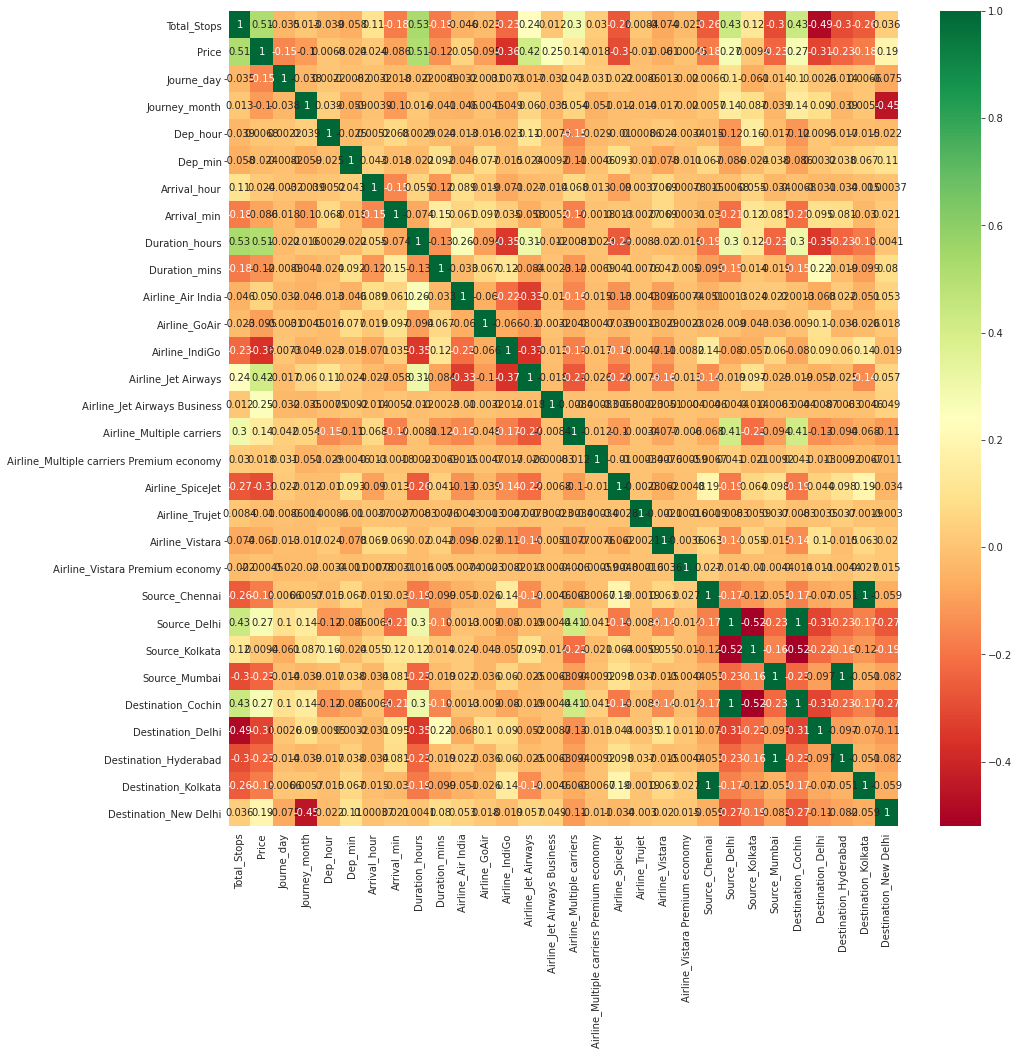

In [86]:
#Find Correlation B/W Indepandent and Dependant Variable
corr = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr , annot = True, cmap = "RdYlGn")
plt.show()

In [87]:
#Important Feature using ExtraTreesRegresor
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model = model.fit(X,y)

In [88]:
print(model.feature_importances_)

[2.02391206e-01 1.43291621e-01 5.29830652e-02 2.36590827e-02
 2.15007151e-02 2.83005072e-02 1.86452233e-02 1.25829712e-01
 1.72418690e-02 1.43628316e-02 2.61058456e-03 2.40910234e-02
 1.41962781e-01 6.81037082e-02 1.36522079e-02 8.11259788e-04
 4.28527769e-03 1.19612402e-04 4.57748730e-03 7.73915838e-05
 5.05218876e-04 1.26655250e-02 3.74630736e-03 5.28556646e-03
 1.63623590e-02 1.86062040e-02 8.78956933e-03 6.14425443e-04
 2.49276576e-02]


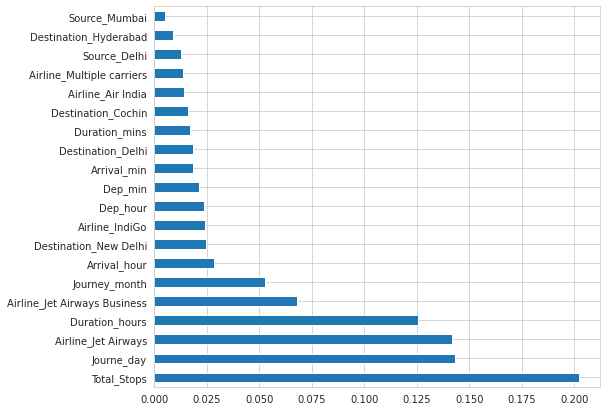

In [89]:
#Plot Graph of Feature Importances for better Visulization
plt.figure(figsize=(8,7))
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(20).plot(kind='barh')
plt.show()

We have seen that Total_Stops is the most important feature then decreasing in the particuar order

#Spiliting and Fitting the Model

In [90]:
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
#Fitting the RandomForest Model on Xtrain and Ytrain
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(training_x, training_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
#predicting the value on X_test
y_pred = reg_rf.predict(test_x)

In [93]:
reg_rf.score(training_x,training_y)

0.9538255048287053

In [94]:
reg_rf.score(test_x,test_y)

0.7973507033930225

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


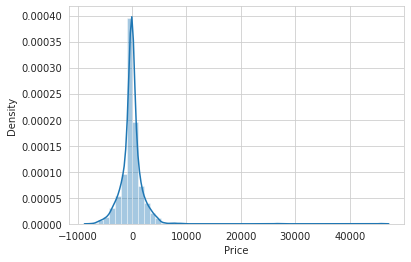

In [95]:
#Plotting the Distribution plot and we find the Gaussian Plot
sns.distplot(test_y-y_pred)
plt.show()

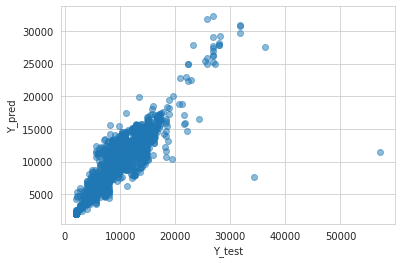

In [96]:
#Scatter plot
plt.scatter(test_y, y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.show()

In [97]:
from sklearn import metrics

In [98]:
#finding the Errors 
print('MAE:', metrics.mean_absolute_error(test_y,y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(test_y,y_pred)))

MAE: 1180.3132889436513
MSE: 4369535.547491419
RMSE: 2090.3434042021468


In [99]:
metrics.r2_score(test_y, y_pred)

0.7973507033930224

#Hyper Parameter Tunning using Randomized Search CV

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [102]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [103]:
rf_random = RandomizedSearchCV( estimator = reg_rf , param_distributions= random_grid , scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [104]:
rf_random.fit(training_x, training_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [105]:
#Find Best parameter
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [106]:
y_pred1 = rf_random.predict(test_x)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


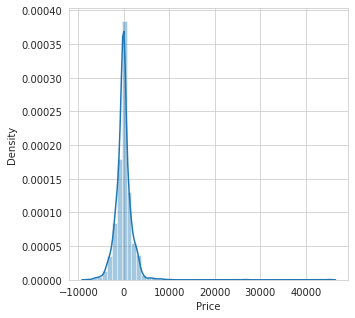

In [107]:
plt.figure(figsize = (5,5))
sns.distplot(test_y-y_pred1)
plt.show()

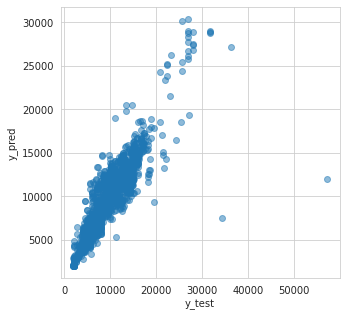

In [108]:
#Scatter Plot
plt.figure(figsize = (5,5))
plt.scatter(test_y, y_pred1, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [109]:
#find the Error
print('MAE:', metrics.mean_absolute_error(test_y, y_pred1))
print('MSE:', metrics.mean_squared_error(test_y, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred1)))

MAE: 1167.8244170867565
MSE: 4074501.1076419386
RMSE: 2018.5393500355494


In [110]:
print("R2 Score of Our Model is : ")
print()
metrics.r2_score(test_y, y_pred1)

R2 Score of Our Model is : 



0.8110337415696213